# Terrain Motion Displacement - Flat 10cm (Scaled - Exhaustive) - Scores

## 1) IPython Setup

In [ ]:
%%javascript
/* 
 * Force prevention of output scroll toggle.
 * Original source: https://github.com/ipython/ipython/issues/2172#issuecomment-53708976 
 */
IPython.OutputArea.auto_scroll_threshold = 9999;

In [20]:
%load_ext ipycache
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)

# We have to add a reference to the parent folder in order to access the modules.
import sys,os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import main as templ
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tse.tse_matchmethod import tse_match_methods
from tse.tse_matchtype import TSEMatchType
from tse.tse_datautils import TSEDataUtils

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


## 2) Calculate Displacement 

In [21]:
%%cache -d cache/ cache_flat_10cm_scaled_exhaustive_scores.pkl results_dict

config_file = "../../eval_data/calib/calibdata_23_03_15_11_07_04.txt"

image_pairs = [
                ("../../eval_data/motion_images/flat_10cm/IMG1.JPG", "../../eval_data/motion_images/flat_10cm/IMG2.JPG"),
                ("../../eval_data/motion_images/flat_10cm/IMG3.JPG", "../../eval_data/motion_images/flat_10cm/IMG4.JPG"),
                ("../../eval_data/motion_images/flat_10cm/IMG5.JPG", "../../eval_data/motion_images/flat_10cm/IMG6.JPG"),
                ("../../eval_data/motion_images/flat_10cm/IMG7.JPG", "../../eval_data/motion_images/flat_10cm/IMG8.JPG"),
                ("../../eval_data/motion_images/flat_10cm/IMG9.JPG", "../../eval_data/motion_images/flat_10cm/IMG10.JPG"),
                ("../../eval_data/motion_images/flat_10cm/IMG11.JPG", "../../eval_data/motion_images/flat_10cm/IMG12.JPG")
              ]

patch_sizes = [100]

match_method1 = TSEMatchType("DistanceEuclidean", tse_match_methods.DISTANCE_ED, None, "r", reverse_score=True)
# match_method2 = TSEMatchType("HistCorrel", tse_match_methods.HIST, cv2.cv.CV_COMP_CORREL, "b")
# match_method3 = TSEMatchType("HistChiSqr", tse_match_methods.HIST, cv2.cv.CV_COMP_CHISQR, "g", reverse_score=True)
# match_method4 = TSEMatchType("DistanceCorr", tse_match_methods.DISTANCE, cv2.cv.CV_TM_CCORR_NORMED, "y")

match_methods = [match_method1]

results_dict = templ.start_tests(image_pairs, patch_sizes, match_methods, config_file, exhaustive_search=True, use_scaling=True, plot_results=False)

[Skipped the cell's code and loaded variables results_dict from file '/Users/connorgoddard/Desktop/CS39440-major-project/src/template_matching_scaling/notebooks/cache/cache_flat_10cm_non_scaled_scores.pkl'.]


## 3) Tests

### Test 1: IMG1/IMG2 - 50px patch - *DistanceEuclidean*, *DistanceCorr*, *HistCorrel*, *HistChiSqr*

[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,

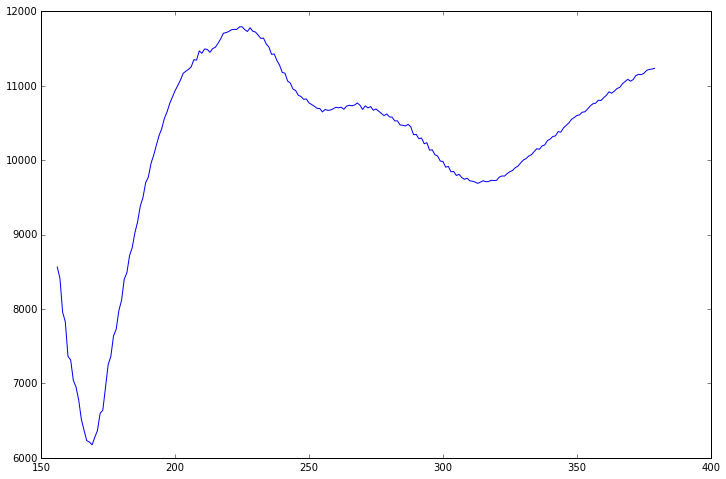

In [22]:
results_pair1_100 = results_dict['IMG1.JPG_IMG2.JPG'][100]

final_results = {}
format_ids = ["b", "g", "r", "y"]

for method in results_pair1_100:
        
    if method not in final_results:
        final_results[method] = {}

    data = results_pair1_100[method]

    final_results[method]['displacement'] = [result.displacement for result in data]

    final_results[method]['row'] = [result.row for result in data]
    
    final_results[method]['match_scores'] = [result.match_scores for result in data]


# print final_results['DistanceEuclidean']['match_scores']

print final_results['DistanceEuclidean']['row']
# print final_results['DistanceEuclidean']['match_scores'][0]

scores = [result[0] for result in final_results['DistanceEuclidean']['match_scores'][1]]
rows = [result[1] for result in final_results['DistanceEuclidean']['match_scores'][1]]

# print scores
# print rows

plt.plot(np.array(rows), np.array(scores), "{0}-".format('b'), label=result)
    
    
# for i, result in enumerate(final_results):
    
#     final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['displacement']), 10)
    
#     plt.plot(np.array(final_results[result]['row']), np.array(final_results[result]['displacement']), "{0}.".format(format_ids[i]), label=result)
    
#     plt.plot(final_results[result]['row'][len(final_results[result]['row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                 

# plt.title('Vertical Motion Displacement - IMG1/IMG2 - 50px patch height')
# plt.xlabel('Image Row Height (px)')
# plt.ylabel('Vertical Displacement (px)')
# plt.legend(loc='upper left')
# plt.show()